<h1>Sales by Genres Data Analysis</h1>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

games_df = pd.read_csv('../data/normalized_games_data.csv')

In [24]:
games_df.head(10)

,rank,game,platform,publisher,developer,vgchartz_score,total_shipped,total_sales,north_america_sales,pal_sales,japan_sales,other_sales,release_date,metacritic_count,metacritic_score,metacritic_user_count,metacritic_user_score,esrb_rating,genre
0,1,Tetris,Series,The Tetris Company,Alexey Pajitnov,NaN,496.40,NaN,NaN,NaN,NaN,NaN,1988-01-01,NaN,NaN,NaN,NaN,NaN,Puzzle
1,2,Pokemon,Series,Nintendo,Game Freak,NaN,480.00,NaN,NaN,NaN,NaN,NaN,1998-09-28,NaN,NaN,NaN,NaN,NaN,Puzzle
2,3,Super Mario,Series,Nintendo,Nintendo,NaN,400.39,NaN,NaN,NaN,NaN,NaN,1983-07-20,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Call of Duty,Series,Activision,Infinity Ward,NaN,400.00,NaN,NaN,NaN,NaN,NaN,2003-10-29,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Grand Theft Auto,Series,Rockstar Games,Rockstar North,NaN,400.00,NaN,NaN,NaN,NaN,NaN,1998-03-27,NaN,NaN,NaN,NaN,NaN,NaN
5,6,FIFA,Series,EA Sports,Extended Play Productions (1991-1997),NaN,325.00,NaN,NaN,NaN,NaN,NaN,1993-12-15,NaN,NaN,NaN,NaN,NaN,Action
6,7,Minecraft,Series,Mojang,Mojang,NaN,238.00,NaN,NaN,NaN,NaN,NaN,2011-11-18,33.0,68.0,23.0,71.0,M,Action
7,8,Minecraft,All,Mojang,Mojang AB,NaN,238.00,NaN,NaN,NaN,NaN,NaN,2011-11-18,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Lego,Series,Warner Bros. Interactive Entertainment,TT Fusion,NaN,203.22,NaN,NaN,NaN,NaN,NaN,1997-09-26,NaN,NaN,NaN,NaN,NaN,Misc
9,10,Assassin's Creed,Series,Ubisoft,Ubisoft,NaN,200.00,NaN,NaN,NaN,NaN,NaN,2007-11-13,NaN,NaN,NaN,NaN,NaN,Misc


<h2>1. What is the distribution of the number of sales and a video game's genre?</h2>

The number of games we are analyzing for this question: 17932


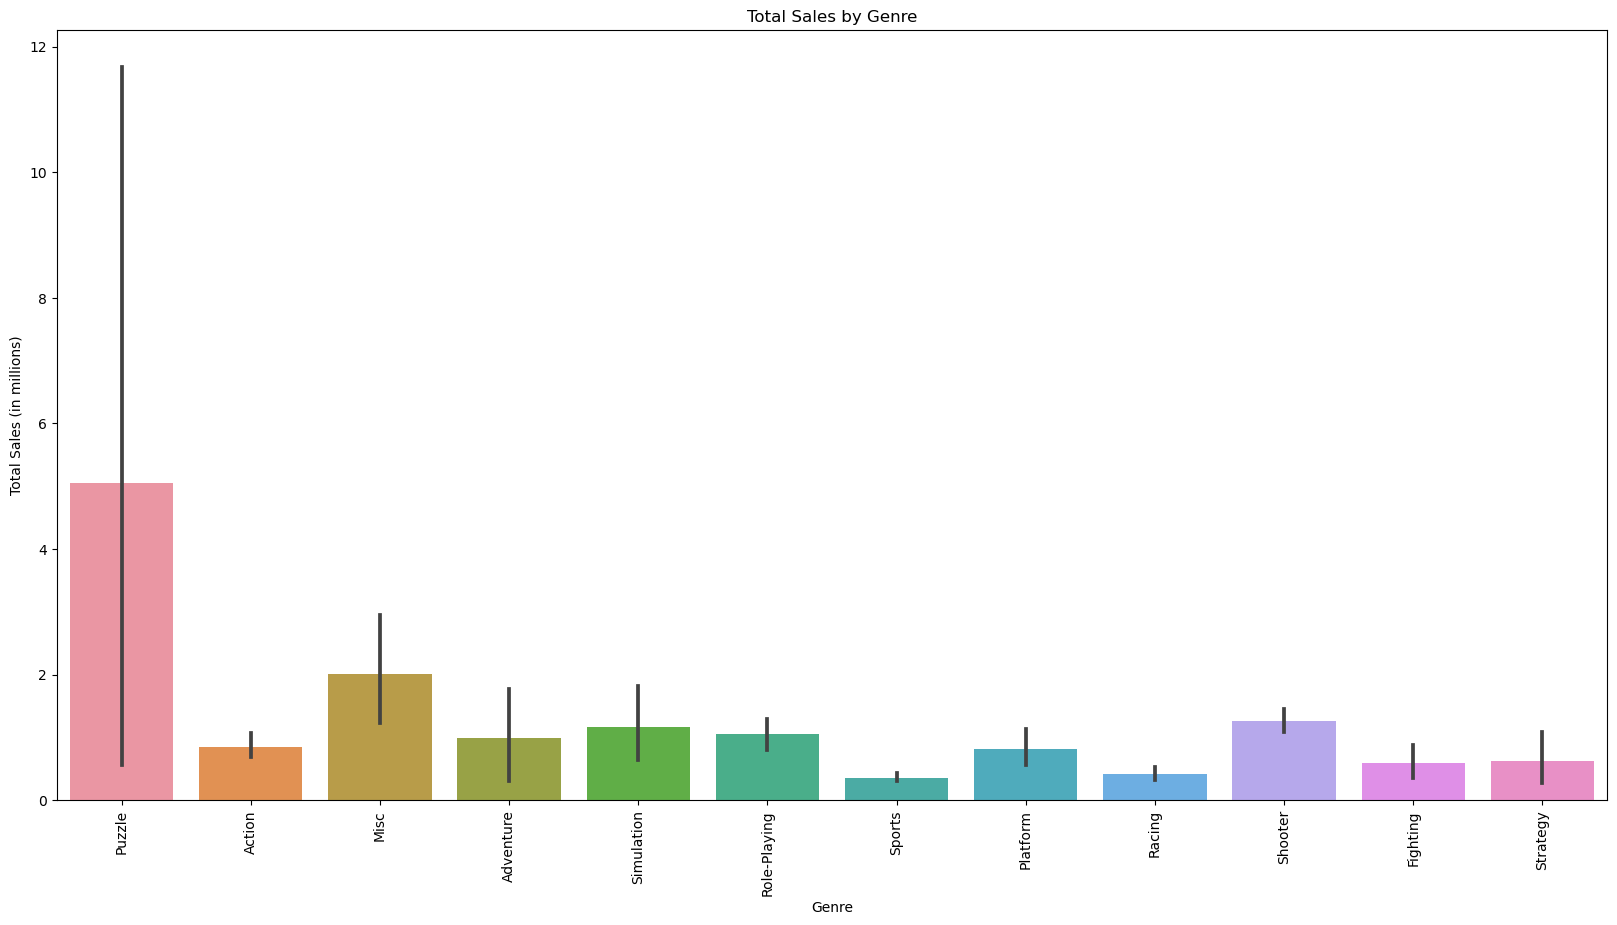

In [25]:
sales_genre_df = games_df[['genre', 'total_shipped']]

# Drop rows with NaN values
sales_genre_df = sales_genre_df.dropna()

game_sales = np.array(sales_genre_df['total_shipped'].astype(int))
game_genres = np.array(sales_genre_df['genre'])

print(f'The number of games we are analyzing for this question: {len(game_sales)}')

# Box and Whisker Plot
plt.figure(figsize=(20, 10))
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=90)
sns.barplot(x=game_genres, y=game_sales)
plt.show()
